# Neural Networks


## 1 Perceptrons & Classification Problems
Perceptron is an algorithm for supervised learning of binary classifiers, type of a linear classfier, the basic unit of Neural Networks. It can be shown as picture below:

<img src="img/Perceptron.png" width="550">

### 1.1 Perceptrons as Logical Operators
Perceptrons can be used as logical operators: the AND, OR, NOT and XOR operators. 

In [4]:
import pandas as pd

# Set weight1, weight2, and bias for AND operators
weight1 = 1
weight2 = 1
bias = -1.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]

# Generate and check output
def outputcheck(test_inputs, correct_outputs):
    outputs = []
    for test_input, correct_output in zip(test_inputs, correct_outputs):
        linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
        output = int(linear_combination >= 0)
        is_correct_string = 'Yes' if output == correct_output else 'No'
        outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    return outputs

# Print output
outputs =  outputcheck(test_inputs, correct_outputs)
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.5                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.5                    1          Yes


In [5]:
# Set weight1, weight2, and bias for OR operators
weight1 = 1
weight2 = 1
bias = -0.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

# Print output
outputs =  outputcheck(test_inputs, correct_outputs)
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -0.5                    0          Yes
      0          1                   0.5                    1          Yes
      1          0                   0.5                    1          Yes
      1          1                   1.5                    1          Yes


Unlike the two perceptrons we looked at above, the NOT operation only cares about one input. The operation returns a 0 if the input is 1 and a 1 if it's a 0. The other inputs to the perceptron are ignored.

In [6]:
# Set weight1, weight2, and bias for Not operations
weight1 = 0.0 # input 1 is ignored here for Not operation
weight2 = -1
bias = 0.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Print output
outputs =  outputcheck(test_inputs, correct_outputs)
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.5                    1          Yes
      0          1                  -0.5                    0          Yes
      1          0                   0.5                    1          Yes
      1          1                  -0.5                    0          Yes


XOR logic need to be achieved by multi-layer perceptron from the AND, NOT, and OR perceptrons, as the picture shown below
<img src="img/XOR.png" width="550">

In [25]:
# Set weight1, weight2, and bias for AND operators
weight11 = 1
weight12 = 1
bias1 = -1.5

weight21 = 1
weight22 = 1
bias2 = -0.5

weight31 = -1
bias3 = 0.5

weight41 = 1
weight42 = 1
bias4 = -1.5

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, False]
outputs = []

# Generate and check output

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination1 = weight12 * test_input[0] + weight12 * test_input[1] + bias1
    output1 = int(linear_combination1 >= 0)
    linear_combination2 = weight21 * test_input[0] + weight22 * test_input[1] + bias2
    output2 = int(linear_combination2 >= 0)
    linear_combination3 = output1 * weight31 + bias3
    output3 = int(linear_combination3 >= 0)
    linear_combination4 = weight42 * output3 + weight42 * output2 + bias4
    output = int(linear_combination4 >= 0)
    
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination4, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -0.5                    0          Yes
      0          1                   0.5                    1          Yes
      1          0                   0.5                    1          Yes
      1          1                  -0.5                    0          Yes


### 2 Perceptron Algorithm
For a binary classification problem, a perceptron can be trained using the Perceptron Algorithm described as bellow:

For a point labeled as $y$, and prediction given by the current linear combination is $\hat{y}$:

* If the point is correctly classified, do nothing.
* If the point is classified possitive but it has negative label, substract the current weights with $\alpha (w_1, w_2, ..., w_n,b)$
* If the point is calssified negative but it has possitive lable, add the current weights with $\alpha (w_1, w_2, ..., w_n,b)$

$\alpha$ is learning rate, normally a small number like 0.1.

In [27]:
import numpy as np

In [106]:
# Setting the random seed
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

def perceptronStep(X, y, W, b, learn_rate = 0.01):
    """
    The function should receive as inputs the data X, the labels y,
    the weights W (as an array), and the bias b,
    update the weights and bias W, b, according to the perceptron algorithm,
    and return W and b.
    """
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    """
    This function runs the perceptron algorithm repeatedly on the dataset,
    and returns a few of the boundary lines obtained in the iterations,
    for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [38]:
data = pd.read_csv("data/perceptron.csv",header = None)

In [55]:
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

In [107]:
boundary_lines = trainPerceptronAlgorithm(X,y)

In [63]:
import matplotlib.pyplot as plt

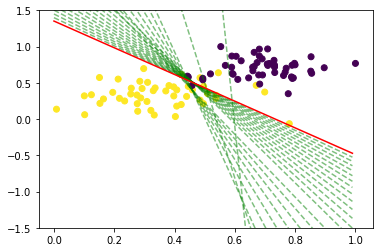

In [126]:
plt.ylim(-1.5,1.5)
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
theta = np.arange(0, 1, 0.01)
for i in range(len(boundary_lines)-1):
    plt.plot(theta, boundary_lines[i][0][0]*theta + boundary_lines[i][1][0],'g--',alpha=0.5)
plt.plot(theta, boundary_lines[len(boundary_lines)-1][0][0]*theta + boundary_lines[len(boundary_lines)-1][1][0],"r")
plt.show()